<ipython-input-110-3fab763e94bd>:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


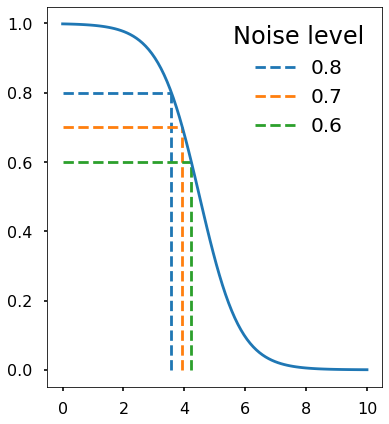

In [110]:
import numpy as np
from matplotlib import style; style.use('seaborn-poster')
from matplotlib import pyplot as plt

def sig(x, b, c):
    return 1 / (1 + np.exp(b * (x - c)))

def isig(x, b, c):
    return np.log(1/x - 1) / b  + c

xr = np.linspace(0, 10, 100)
thresholds = [.8, .7, .6]
from scipy.optimize import *
colors = plt.cm.tab10(range(len(thresholds)))
fig, ax = plt.subplots(figsize = (6,7))

b, c = 1.5, 4.5# sig parameters 

options = dict(\
               bounds = (0, np.inf),\
               nfev = int(1e6), nit = int(1e3))
for i, th in enumerate(thresholds):
    l = lambda x: sig(x, b, c) - th
#     r = basinhopping(l, 1)
#     r = fsolve(l, .5)
    r = isig(th, b, c)
#     ax.axvline(r, color = colors[i], linestyle = 'dashed', label = th)
#     ax.axhline(th, xmin = 0, xmax = 1, color = colors[i], linestyle = 'dashed', label = th,\
#           transform = ax.transData)
    ax.plot((0, r), (th, th), color = colors[i],\
           linestyle = 'dashed')
    ax.plot((r, r),  (0, th), color = colors[i],\
           linestyle = 'dashed', label = th)
    
ax.plot(xr, sig(xr, b, c))
# ax.set_ylabel(r'$<M>$', fontsize = 30)
ax.legend(title = 'Noise level', title_fontsize = 24, frameon = 0, fontsize = 20)
fig.savefig('stylized_ratios.svg', transparent = 1, bbox_inches = 'tight', pad_inches =  0)
fig.show()
